In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import warnings
import math
import tensorflow as tf
warnings.simplefilter("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import mean_squared_error
from sklearn.metrics import f1_score
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
data_train = data[data['Usage']=='Training'].copy()
data_val   = data[data['Usage']=='PublicTest'].copy()
data_test  = data[data['Usage']=='PrivateTest'].copy()
print("train shape: {}, \nvalidation shape: {}, \ntest shape: {}".format(data_train.shape, data_val.shape, data_test.shape))

train shape: (28709, 3), 
validation shape: (3589, 3), 
test shape: (3589, 3)


In [5]:
num_classes = 7 
width, height = 48, 48
num_epochs = 50
batch_size = 64
num_features = 64

In [6]:
data['pixels'].dtype

dtype('O')

In [141]:
n_samples = len(data)
n_samples_train = 28709
n_samples_test = 3589
n_samples_validation = 3589

y = data['emotion']
X = np.zeros((n_samples, width, height, 1))
for i in range(n_samples):
    X[i] = np.array([int(pixel) for pixel in data['pixels'][i].split()]).reshape(48,48,1)

#Training set   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [142]:
y_train = to_categorical(y_train)

In [143]:
resnet = tf.keras.applications.resnet50.ResNet50(include_top=True, weights=None, input_shape=(48,48,1), classes=7, pooling='average', classifier_activation='softmax')

In [144]:
resnet.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), 
              metrics=['accuracy'])

In [145]:
resnet.fit(X_train, y_train, epochs = 40)

Epoch 1/40
1010/1010 [==============================] - 119s 111ms/step - loss: 1.8531 - accuracy: 0.3267
Epoch 2/40
1010/1010 [==============================] - 111s 110ms/step - loss: 1.5703 - accuracy: 0.4195
Epoch 3/40
1010/1010 [==============================] - 111s 110ms/step - loss: 1.5580 - accuracy: 0.4271
Epoch 4/40
1010/1010 [==============================] - 111s 110ms/step - loss: 1.7219 - accuracy: 0.3606
Epoch 5/40
1010/1010 [==============================] - 111s 110ms/step - loss: 1.5602 - accuracy: 0.4092
Epoch 6/40
1010/1010 [==============================] - 111s 110ms/step - loss: 1.3613 - accuracy: 0.4779
Epoch 7/40
1010/1010 [==============================] - 111s 110ms/step - loss: 1.3186 - accuracy: 0.5016
Epoch 8/40
1010/1010 [==============================] - 112s 110ms/step - loss: 1.2640 - accuracy: 0.5188
Epoch 9/40
1010/1010 [==============================] - 111s 110ms/step - loss: 1.1710 - accuracy: 0.5569
Epoch 10/40
1010/1010 [=======================

In [146]:
resnet.save('/content/gdrive/MyDrive/resnet_model')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/resnet_model/assets


In [147]:
pred = resnet.predict(X_test)

In [148]:
predictions = []
for p in pred:
  predictions.append(np.argmax(p))

In [149]:
f1_score(y_test, predictions, average='weighted')

0.59265143609979

In [181]:
vggnet = tf.keras.applications.vgg19.VGG19(include_top=True, weights=None, input_shape=(48,48,1), classes=7, pooling='max', classifier_activation='softmax')

In [186]:
vggnet.compile(loss='categorical_crossentropy', 
              optimizer=SGD(lr=0.01), 
              metrics=['accuracy'])

In [187]:
vggnet.fit(X_train, y_train, epochs = 40)

Epoch 1/40
1010/1010 [==============================] - 111s 109ms/step - loss: 1.7426 - accuracy: 0.2985
Epoch 2/40
1010/1010 [==============================] - 110s 109ms/step - loss: 1.5854 - accuracy: 0.3844
Epoch 3/40
1010/1010 [==============================] - 110s 109ms/step - loss: 1.4760 - accuracy: 0.4315
Epoch 4/40
1010/1010 [==============================] - 110s 109ms/step - loss: 1.3975 - accuracy: 0.4634
Epoch 5/40
1010/1010 [==============================] - 110s 109ms/step - loss: 1.3122 - accuracy: 0.4966
Epoch 6/40
1010/1010 [==============================] - 110s 109ms/step - loss: 1.2323 - accuracy: 0.5312
Epoch 7/40
1010/1010 [==============================] - 110s 109ms/step - loss: 1.1514 - accuracy: 0.5630
Epoch 8/40
1010/1010 [==============================] - 110s 109ms/step - loss: 1.0777 - accuracy: 0.5945
Epoch 9/40
1010/1010 [==============================] - 109s 108ms/step - loss: 0.9965 - accuracy: 0.6286
Epoch 10/40
1010/1010 [=======================

In [188]:
vggnet.save('/content/gdrive/MyDrive/vggnet_model')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/vggnet_model/assets


In [189]:
print(X_test[0].shape)
pred = vggnet.predict(X_test)
predictions = []
for x in pred:
 predictions.append(np.argmax(x))

(48, 48, 1)


In [190]:
f1_score(y_test, predictions, average='weighted')

0.5801448243113637

(array([522.,  52.,   0., 525.,   0., 867., 613.,   0., 399., 611.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

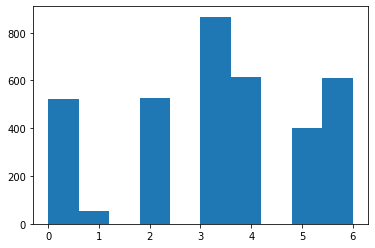

In [159]:
plt.hist(y_test)

In [191]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
matrix.diagonal()/matrix.sum(axis=1)

array([0.47126437, 0.42307692, 0.43047619, 0.78662053, 0.57748777,
       0.73433584, 0.42880524])

In [137]:
def get_emotion(cl):
  k = []
  for i in range(len(y_test)):
    if y_test.iloc[i] == cl:
      k.append(X_test[i])
  return np.array(k)

angry = get_emotion(0)
fear = get_emotion(1)
sad = get_emotion(2)
neutral = get_emotion(3)
happy = get_emotion(4)
surprise = get_emotion(5)
disgust = get_emotion(6)

In [138]:
def check(model,input, loss, cl):
  pred = []
  pred = model.predict(input)
  predictions = []
  for x in pred:
    predictions.append(np.argmax(x))
  y_k = []
  for i in range(len(input)):
    y_k.append(cl)
  if loss == f1_score:
    return loss(y_k, predictions, average = 'weighted')
  else:
    return loss(y_k, predictions)

In [111]:
#эксперименты
resnet = tf.keras.applications.resnet50.ResNet50(include_top=True, weights=None, input_shape=(48,48,1), classes=7, pooling='average', classifier_activation='softmax')
resnet.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), 
              metrics=['accuracy'])
vggnet = tf.keras.applications.vgg19.VGG19(include_top=True, weights=None, input_shape=(48,48,1), classes=7, pooling='average', classifier_activation='softmax')
vggnet.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), 
              metrics=['accuracy'])

In [112]:
#уменьшу количество угадываемых эмоций
all_neutral = data.loc[data['emotion'] == 3]
a, at = train_test_split(all_neutral, test_size=0.2, random_state=10)
df = data.loc[data['emotion'] != 3]
df = df.append(a)
df = shuffle(df) 
print(df)

       emotion                                             pixels       Usage
22699        0  62 118 77 25 49 54 78 123 152 152 151 154 158 ...    Training
24636        4  9 8 9 13 130 83 0 11 8 15 20 15 12 14 12 12 11...    Training
25826        2  82 112 147 142 186 212 194 149 119 99 90 88 86...    Training
20937        3  0 0 0 0 0 1 8 18 11 59 177 212 204 189 172 160...    Training
20689        0  178 182 201 146 148 159 178 198 198 174 168 59...    Training
...        ...                                                ...         ...
29835        4  33 42 38 56 70 69 62 66 78 86 101 98 74 74 105...  PublicTest
5062         3  22 19 21 22 23 25 26 26 25 26 30 47 82 116 136...    Training
11891        4  222 235 238 237 236 231 227 230 212 194 189 19...    Training
30665        4  63 89 122 142 136 117 113 120 121 125 128 119 ...  PublicTest
16940        5  123 115 104 93 80 104 127 128 124 146 134 138 ...    Training

[34089 rows x 3 columns]


In [113]:
new_y = df['emotion']
new_X = np.zeros((len(df), width, height, 1))
for i in range(len(df)):
    new_X[i] = np.array([int(pixel) for pixel in df['pixels'].iloc[i].split()]).reshape(48,48,1)

In [114]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.1, random_state=10)

In [115]:
new_X_train = new_X_train / 255

In [116]:
new_y_train = to_categorical(new_y_train)

In [117]:
resnet.fit(new_X_train, new_y_train, epochs = 2)

Epoch 1/2
959/959 [==============================] - 114s 111ms/step - loss: 1.8560 - accuracy: 0.3124
Epoch 2/2
959/959 [==============================] - 107s 111ms/step - loss: 1.5794 - accuracy: 0.4109
